# Greetings traveller! 

Welcome to Week 1 of the AIAP coursework. In the next 6 weeks, you will be *travelling* through the machine learning space, where we will be looking at various different machine learning problems and how to solve them. We will be taking a quick sweep through the many areas of analytics and machine learning, including learning about learning from data itself.

For some, this may be a revision of previously learned concepts. In that case we would advice you to take this opportunity to refresh yourself and find clarity in areas you may have previously sped past. For others, many areas will be new, and we would advice you to take your time, and build your fundamentals well, as they will pay off in the long term.

Our course is designed to train commandos in the machine learning space - people who can not only do statistical modelling and learning, but also learn to work with data, and in the process write high quality, collaboration-focused or production-geared code. Different individuals may find different areas challenging; as such, do ask questions and help each other out when necessary.

This is not a course for pure beginners. Some basic areas will not be touched upon in the class, and we will initially highlight them with <font color=red>red</font> text. We are not saying that 100% of the participants know these concepts with 100% confidence. Feel free to approach a peer or any of us if you require assistance, especially specialised technical assistance.  
  
 <font color=red>Pre-requisite: you should know how to use Jupyter notebooks!</font>
 
## Collaboration Policy

Collaboration is the best way to learn. In short, we should optimise learning - the general rule is to try everything yourself first, then discuss your method with your teammates. Do not directly copy their code, unless you are trying to learn a programming technique. Be smart and flexible - do your own thinking and write your own code.

If you believe referring to someone's answer is the best way to learn, we recommend looking at the code, then walking away for a few minutes, and come back to write your own version of the code. There will be minimum policing, but we expect no plagurism or direct copying of code to occur.

Please list your collaborators:

In [ ]:
1. John Smith
2. ???

## Time Management and Learning Prioritisation

In this notebook, there will two main areas of focus: modelling, and model implementation (numerical programming). For those who are strong at programminh, we recommend focusing more time on the modelling and data exploration process, and vice versa. Regardless, learning is your own responsibility, and it is up to you to prioritise and allocate your time!

Now, let's get into week one of the course! __Good luck, have fun.__

# 1. Initial Modelling 

Our problem this week is the el classico: the Titanic dataset, a dataset probably done to death by fellow travellers of the machine learning space. There is a reason why this dataset is so popular - it demands for all the fundamentals required of statistical modelling, while staying light in terms of technical demands. With just 891 rows of data, the problem can be solved on any laptop. While your laptop would not face much stress this week, we would recommend you to consider your technical set-up, so that as heavier datasets come about (in the size of GBs), you will not be limited by them.
<font color=red>Pre-requisite: you should know that this is a classification problem.</font>

First, go grab the data. The data is available at https://www.kaggle.com/c/titanic/data, you will need to register an account to retrieve it.

Since we are talking about downloading data, we should take this time to set up your folder. One such way (our recommended way) to do it as to create a project folder, then leave your notebooks in the root of that folder. Your code base, which we will be starting to build over time, should be in a `src` subfolder, while your data should be in a `data` folder, with a tree structure as shown:

```
aiap
 |- src
 |- data
 |   |- titanic.csv
 |   |- titanic_test.csv
 |- week1.ipynb
```

This is an opinionated format - we suggest this only for simplicity reasons. For discussion on this, you may visit the below resources [Jeanne to advise]:
- Software Carpentry
- Jenny Bryan's stuff

Now, we are ready to do some coding work. First, import the necessary libraries you need - tools like `np`, `pd`, `plt` and your `sklearn` libraries.
<font color=red>Checkpoint: you should know what and how to import your required resources.</font>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Import your data. Using the `train_test_split` method, reserve some validation data for evaluation use.
<font color=red>Checkpoint: you should know why and how to create a basic validation dataset (hint: `sklearn.model_selection`).</font>

In [2]:
titanic = pd.read_csv('data/titanic.csv')

## Initial Description 

You may see an accuracy of below 75% - this does not mean anything substantially, but it lets us know that a no-value-add approach to modelling will already generate this accuracy for us. Hence, our goal is to improve upon this current score, and reach as high as possible.

If you were to look at the leaderboards, you will see that accuracy scores go as high as 90+%. Truth be told, we don't think all of these scores are legitimate. The names of survivors are publicly available, so someone might have filled up an excel sheet and submitted it. Nevertheless, we should know that a score of ~90% is perhaps possible.

Consideration: what is the metric we are to evaluate our accuracy?

In [3]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Yasbeck, Mr. Antoni",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
titanic[titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
titanic.Embarked = titanic.Embarked.fillna('S')

In [6]:
titanic.Age = titanic.Age.fillna(titanic.Age.mean())

In [7]:
titanic = titanic.drop('Cabin', axis=1)

In [8]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Yasbeck, Mr. Antoni",male,NaN,NaN,NaN,CA. 2343,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [9]:
titanic_noname_noticket = titanic.drop(['Name', 'Ticket'], axis=1)

In [10]:
titanic_dummies = pd.get_dummies(titanic_noname_noticket)
titanic_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


Train a stock model (with no custom parameters and report the accuracy score).

In [182]:
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(titanic_dummies[titanic_dummies.columns.drop('Survived')], titanic_dummies['Survived'])
    rf_initial = RandomForestClassifier(n_estimators=100)
    rf_initial.fit(X_train, y_train)
    scores.append(rf_initial.score(X_test, y_test))
np.mean(scores)

0.8147982062780268

Depending on the variables you had to drop or clean, as well as how you did your model evaluation, your result should be approximately 75-85%. That's good enough for us to proceed.

# 2. Exploring the data 

## Overall Dataset 

Conduct some initial exploration of this data. This could be through dataset level plots, correlation charts and table describes, as well as by understanding what kind of information is available, or not available (i.e. missing). Write a paragraph on what you observe in the data. There is no correct answer, but do present useful and insightful information as much as possible.

This part of the notebook should be helpful to someone who is trying to come into your project, but has no knowledge of the data. Given that this is an easy dataset, this section will not be very challenging, but in complex, real-world problems, this section may take months in an iterative manner.
<font color=red>Checkpoint: you should know how to manipulate, transform and plot interesting informaiton.</font>

In [14]:
titanic_raw = pd.read_csv('data/titanic.csv')

In [15]:
sns.set_style('darkgrid')

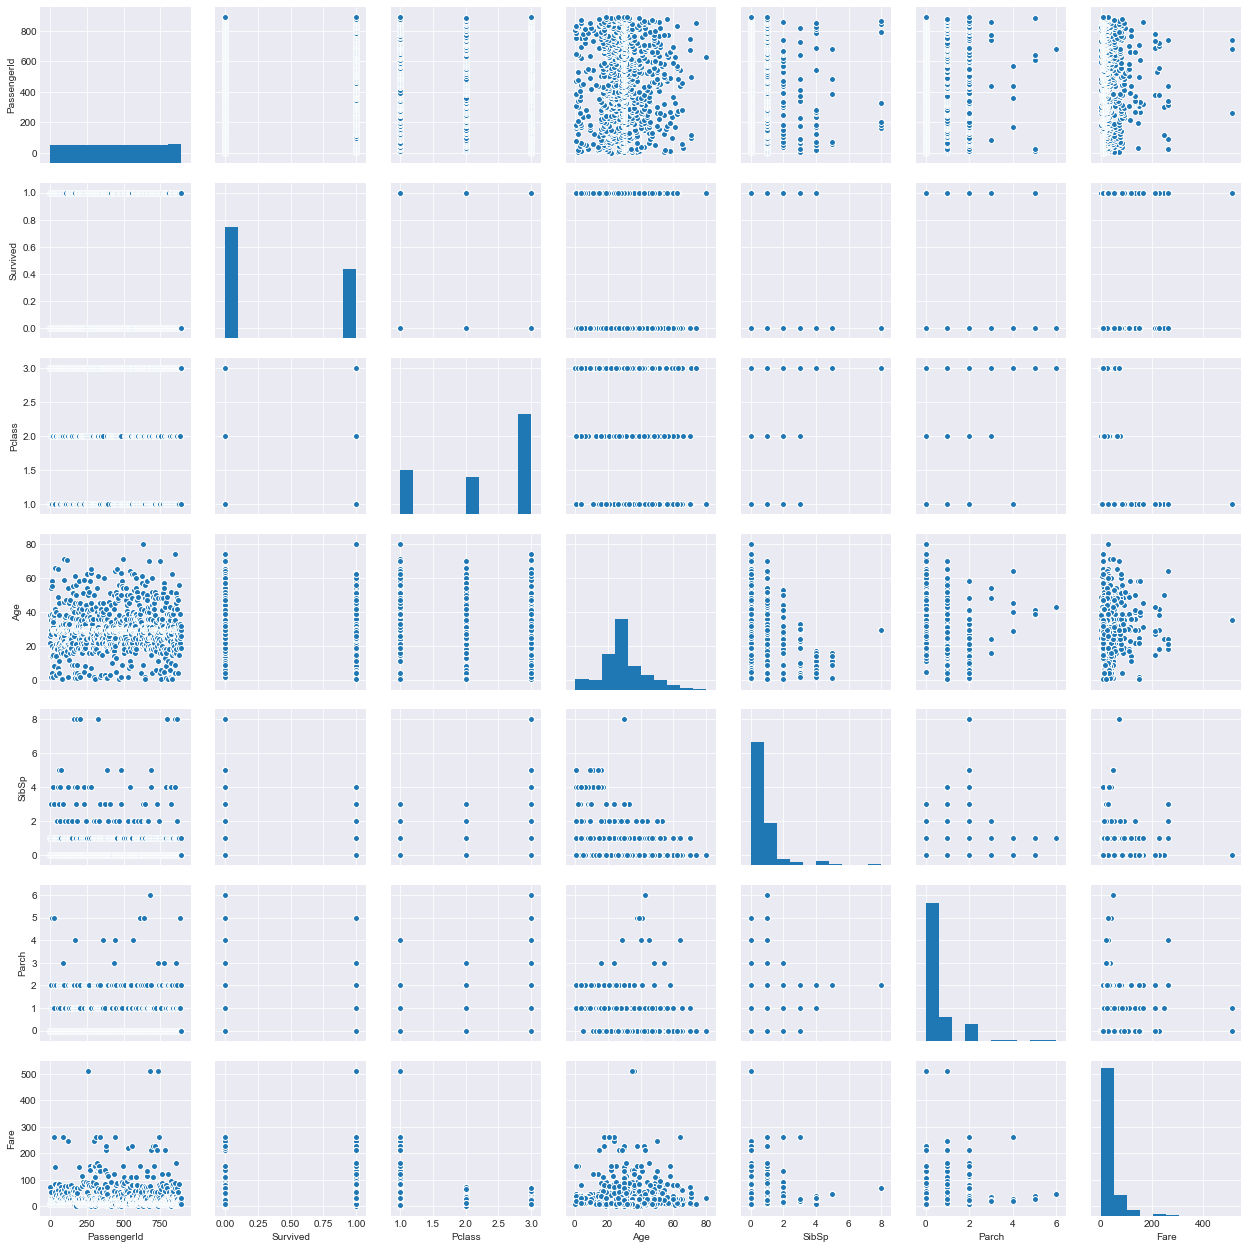

In [16]:
sns.pairplot(titanic)

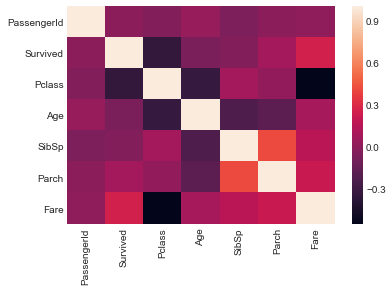

In [17]:
sns.heatmap(titanic.corr())

In [18]:
titanic_raw.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Yasbeck, Mr. Antoni",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [19]:
titanic_raw.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Not much can be seen from the correlation plots, though the histograms do show that most of the people did not survive, most people were pretty young (mode about 30), and most people don't have siblings. Most people are in class 3, and most people have cheap fares. Correlation wise, class, age and survival are quite strongly negatively correlated. Fare and survival are correlated. 

Tickets are fragmented in terms of labels, and same for Cabin. In fact, since 70% of cabin rows are NA, I'm not sure if I will keep this column at all. Embarked only has 2 NAs, and other columns are pretty good.

Either we will need to do some modifications to Cabin, or we might want to turn it into a ordinal variable and leave NA's as 0. Same for names - we have 891 unique names, as expected.

## Individual Variables 

Now, we go deeper into individual variables. For each variable, provide 1 or more plots, tables or descriptions that best capture the nuance of that column. There is once again no correct answer, but there is a gold standard.

Samples of this can be found in Kaggle's kernels page. While we value pretty charts, we value insights much more. Where insightful information is found, please indicate them in your notebook for your reader.

### PassengerId

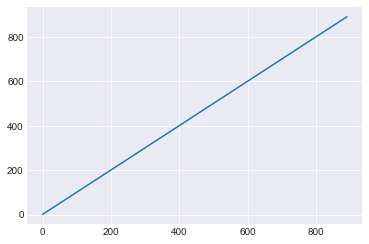

In [20]:
titanic.PassengerId.plot()

An ID variable, which will probably have no impact on the data. However, we should leave it inside and let the model determine if the variable matters, and if it does, try to understand how it helps.

### Survived

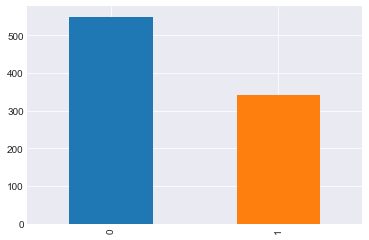

In [21]:
titanic.Survived.value_counts().plot.bar()

Considering that some 62% of people died, our naive model would have already predicted 62% accuracy.

### Pclass

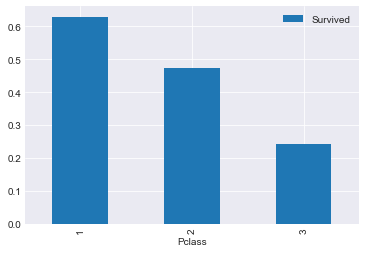

In [22]:
titanic.groupby('Pclass')[['Survived']].mean().plot.bar()

In [23]:
titanic.groupby('Pclass')[['Survived']].count()

,Survived
Pclass,
1,216
2,184
3,491


Pclass=3 (491) has a low chance of survival of 25%, while Pclass=1 (216) is super high >60%.

### Name

In [24]:
titanic.Name.sample(20)

208                  Carr, Miss. Helen "Ellen"
213                Givard, Mr. Hans Kristensen
205                 Strom, Miss. Telma Matilda
341             Fortune, Miss. Alice Elizabeth
308                        Abelson, Mr. Samuel
630       Barkworth, Mr. Algernon Henry Wilson
860                    Hansen, Mr. Claus Peter
407             Richards, Master. William Rowe
589                        Murdlin, Mr. Joseph
16                        Rice, Master. Eugene
830    Yasbeck, Mrs. Antoni (Selini Alexander)
756               Carlsson, Mr. August Sigfrid
558     Taussig, Mrs. Emil (Tillie Mandelbaum)
598                          Boulos, Mr. Hanna
29                         Todoroff, Mr. Lalio
850    Andersson, Master. Sigvard Harald Elias
657              Bourke, Mrs. John (Catherine)
147           Ford, Miss. Robina Maggie "Ruby"
706              Kelly, Mrs. Florence "Fannie"
368                        Jermyn, Miss. Annie
Name: Name, dtype: object

While we know that names are 100% unique - 891 counts of unique names in 891 rows of data, which is to be expected, we can also suspect that people may belong to a family, so some people have the last surname.

In [25]:
titanic['lastname'] = titanic.Name.map(lambda x: x.split(',')[0])
titanic.lastname.value_counts()[:10]

Andersson    9
Sage         7
Skoog        6
Johnson      6
Goodwin      6
Panula       6
Carter       6
Rice         5
Brown        4
Fortune      4
Name: lastname, dtype: int64

In [26]:
titanic[titanic['lastname'] == 'Andersson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,lastname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S,Andersson
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,S,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,S,Andersson
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,Andersson
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,S,Andersson
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,S,Andersson
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,S,Andersson
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,S,Andersson
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,S,Andersson


Out of everyone in the Andersson family, only those with 7.925 ticket fares survived - they were 17 and 27 years old respectively. In fact, "Wennerstrom" seems to not be with the rest of the family - as an individual person, he was able to survive, while only the eldest teenage girl from the large family of 7 survived.

### Sex

        Survived
Sex             
female       314
male         577


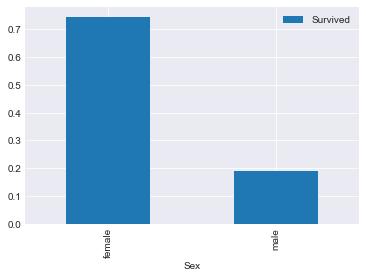

In [27]:
print(titanic.groupby('Sex')[['Survived']].count())
titanic.groupby('Sex')[['Survived']].mean().plot.bar();

Females are disproportionately more likely to survive - >70% of the 314 females survived, while <20% of the 577 males survived.

### Age

In [28]:
titanic[['Survived', 'Age']].dropna().groupby('Survived').mean()

,Age
Survived,
0,30.415100
1,28.549778


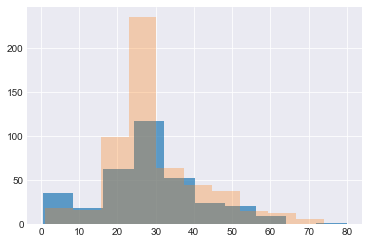

In [29]:
valid_ages = titanic[['Survived', 'Age']].dropna()
fig, ax = plt.subplots(1, 1)
ax.hist(valid_ages[valid_ages.Survived == 1].Age, alpha=0.7);
ax.hist(valid_ages[valid_ages.Survived == 0].Age, alpha=0.3);
plt.show()

In [30]:
from statsmodels.discrete.discrete_model import Logit
logr = Logit(titanic['Survived'], titanic[['Age']])
logr.fit().summary()

Optimization terminated successfully.
         Current function value: 0.663844
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      890
Method:                           MLE   Df Model:                            0
Date:                Thu, 01 Nov 2018   Pseudo R-squ.:                0.003105
Time:                        15:18:23   Log-Likelihood:                -591.49
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0153      0.002     -7.047      0.000      -0.020      -0.011
==============================================================================
"""

Age_bin
(0.419, 18.0]     139
(18.0, 24.0]      138
(24.0, 29.0]      107
(29.0, 29.699]    177
(29.699, 33.0]     79
(33.0, 43.0]      127
(43.0, 80.0]      124
dtype: int64


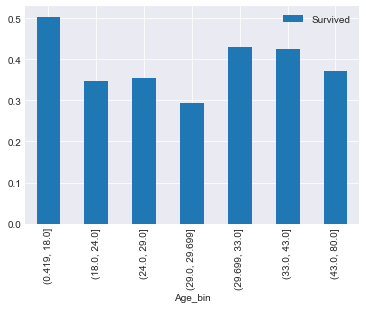

In [31]:
titanic['Age_bin'] = pd.qcut(titanic.Age, 7)
print(titanic.groupby('Age_bin').size())
titanic.groupby('Age_bin')[['Survived']].mean().plot.bar();

It looks like the shape both groups (survive vs did not survive) is rather similar, with not survived having more height as only a minority survived. However, we can also see that at certain age groups, they are equal, but at other age groups, one is much more than other (e.g. 0-10). Furthermore, fitting into a logistic regression, we get a significant negative slope - suggesting to us that young people are more likely to survive.

However, based on the plot, this difference is minimal, likely because it's not a linear trend - the young adults actually have the lowest rate of survival, so it's a V shaped chart.

### SibSp

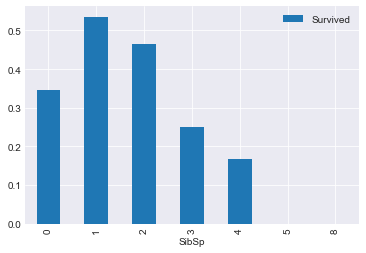

In [32]:
titanic.groupby('SibSp')[['Survived']].mean().plot.bar()

It seens that as the number of siblings/spouses increase, the likelihood of survival decreases. This could have many explanations - that each family were given a quota for example, or that females/children were allowed first. One explanation for SibSp=0 to have a low rate is that these are young men, and hence are given less priority. Regardless, this is a clear observation.

### Parch

       Survived
Parch          
0           678
1           118
2            80
3             5
4             4
5             5
6             1


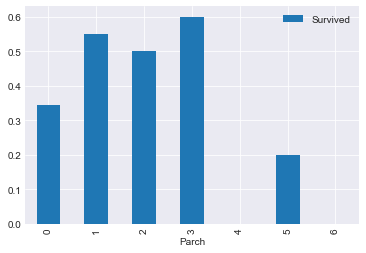

In [33]:
print(titanic.groupby('Parch')[['Survived']].count())
titanic.groupby('Parch')[['Survived']].mean().plot.bar();

We can see that thosse with 1, 2 or 3 parents or children on board seem the have the highest likelihood to survive - in other words, they seem to prioritise families over singles. Perhaps, it is not that families are all prioritized to survive, but that some members of familiess are, while those who travelled individually are not part of this group. The group I am referring to are children, and women. We already know from previous plots that women are most likely to survive.

### Ticket

In [34]:
np.unique(titanic.Ticket.values)

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509',
       '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751',
       '11752', '11753', '11755', '11765', '11767', '11769', '11771',
       '11774', '11813', '11967', '12233', '12460', '12749', '13049',
       '13213', '13214', '13502', '13507', '13509', '13567', '13568',
       '14311', '14312', '14313', '14973', '1601', '16966', '16988',
       '17421', '17453', '17463', '17464', '17465', '17466', '17474',
       '17764', '19877', '19928', '19943

There are way too many combinations of this, though we could do some feature engineering on for example the first 2 characters, the number of characters, the digits at the back, and the complete prefix. This will be done if feature engineering is required.

### Fare

Fare_bin
(-0.001, 7.55]        92
(7.55, 7.854]         87
(7.854, 8.05]        106
(8.05, 10.5]          78
(10.5, 14.454]        84
(14.454, 21.679]      88
(21.679, 27.0]        89
(27.0, 39.688]        91
(39.688, 77.958]      89
(77.958, 512.329]     87
dtype: int64


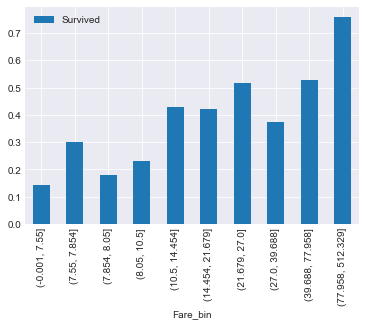

In [35]:
titanic['Fare_bin'] = pd.qcut(titanic.Fare, 10)
print(titanic.groupby('Fare_bin').size())
titanic.groupby('Fare_bin')[['Survived']].mean().plot.bar();

By far, the expensive tickets have a more likely chance to survive!

### Cabin

In [36]:
np.unique(titanic_raw.Cabin.dropna().values)

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

Cabin_char
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
dtype: int64


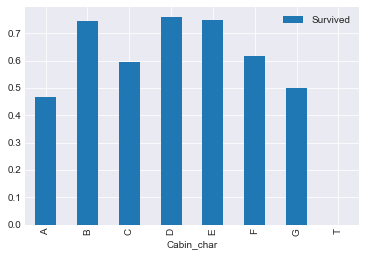

In [37]:
titanic_raw['Cabin_char'] = titanic_raw.Cabin.str[:1]
print(titanic_raw[['Survived', 'Cabin_char']].dropna().groupby('Cabin_char').size())
titanic_raw[['Survived', 'Cabin_char']].dropna().groupby('Cabin_char').mean().plot.bar();

Cabin_num
33            7
6             6
2             5
20            5
49            5
101           5
23 C25 C27    4
35            4
36            4
96 B98        4
50            4
              4
30            3
26            3
38            3
19            3
46            3
68            3
28            3
7             3
dtype: int64


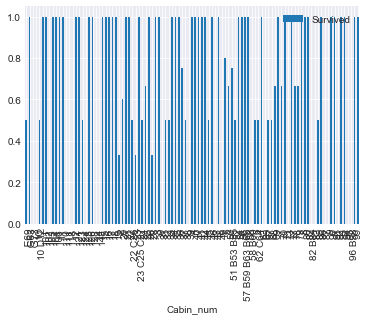

In [38]:
titanic_raw['Cabin_num'] = titanic_raw.Cabin.str[1:]
print(titanic_raw[['Survived', 'Cabin_num']].dropna().groupby('Cabin_num').size().sort_values(ascending=False)[:20])
titanic_raw[['Survived', 'Cabin_num']].dropna().groupby('Cabin_num').mean().plot.bar();
# needs more cleaning?

This is a terrible plot. To do: improve visualisation.

Also, check out https://www.kaggle.com/c/titanic/discussion/4693

### Embarked

Embarked
C    168
Q     77
S    646
dtype: int64


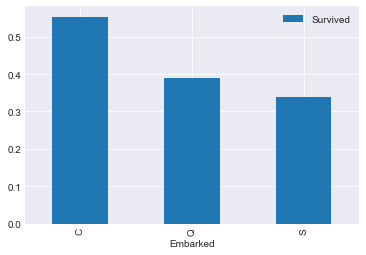

In [39]:
print(titanic[['Survived', 'Embarked']].dropna().groupby('Embarked').size())
titanic[['Survived', 'Embarked']].dropna().groupby('Embarked').mean().plot.bar();

Embarked
C    168
Q     77
S    646
dtype: int64


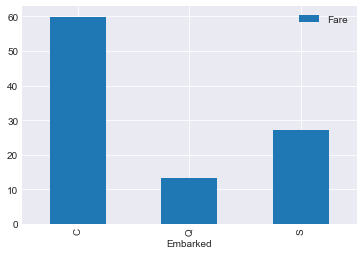

In [40]:
print(titanic[['Fare', 'Embarked']].dropna().groupby('Embarked').size())
titanic[['Fare', 'Embarked']].dropna().groupby('Embarked').mean().plot.bar();

## Overall Summary 

From your own exploration of the data, provide a few paragraphs in summary of the dataset. At this point, it may be helpful to provide a narrative which can reconstruct the situation aboard the titanic as it was sinking. This is also an opportunity to direct your attention towards areas where you feel information is raw and can be improved in your next section, through feature engineering.

Overall, it appears that some variables are more significant than others, but we would imagine that females and children, especially those who embarked at 'C' and are affluent, hence being able to pay for expensive tickets, will survive, while young men whom travelled alone with no kids or parents are most likely to have perished. 

# 3. Model Interpretation and Feature Engineering

In this section, we will begin by learning to appreciate the model interpretation methods related to decision trees and random forests. Then, we will move on to do some feature engineering - hopefully this will give us some information with respect to the dataset.

## Model Interpretation

### Feature importance
Plot a graph/table of feature importance of variables. Is there anything to be expected out of the data? Is there anything unexpected? Compare these findings with your teammate - are there any major differences in these plots?

By the way, does the PassengerId column end up significant for you? Does that make sense?

In [43]:
feature_importances = pd.DataFrame(rf_initial.feature_importances_,index = X_train.columns, columns=['importance'])\
    .sort_values('importance',ascending=False)
feature_importances

,importance
Fare,0.201936
Age,0.181478
Sex_female,0.164752
PassengerId,0.157960
Sex_male,0.115736
Pclass,0.058768
SibSp,0.051946
Parch,0.034414
Embarked_C,0.013336
Embarked_Q,0.010477


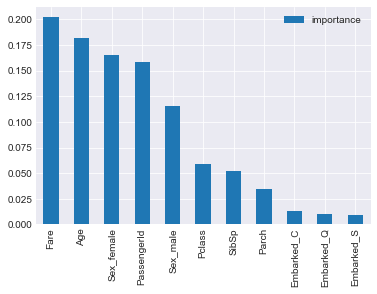

In [45]:
feature_importances.plot.bar();

Although we saw high correlation with `Embarked` at the initial model, it turns out that it has low feature importance. This could be because the variable is highly ocrrelated with `Fare`, and `Fare` is already high in feature importance. This implies we can consider removing the embarked variables so let us give that a try.

In [46]:
titanic_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [184]:
titanic_dummies_noembarked = titanic_dummies.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(
        titanic_dummies_noembarked[titanic_dummies_noembarked.columns.drop('Survived')], 
        titanic_dummies_noembarked['Survived'])
    rf_initial_noembarked = RandomForestClassifier(n_estimators=100)
    rf_initial_noembarked.fit(X_train, y_train)
    scores.append(rf_initial_noembarked.score(X_test, y_test))
np.mean(scores)

0.8198206278026906

Slight increase in accuracy when we take out the variable - why though, need to ask.

In [185]:
feature_importances = pd.DataFrame(rf_initial_noembarked.feature_importances_,index = X_train.columns, columns=['importance'])\
    .sort_values('importance',ascending=False)
feature_importances

,importance
Fare,0.207280
PassengerId,0.198638
Age,0.171416
Sex_male,0.150759
Sex_female,0.114158
Pclass,0.078079
SibSp,0.043451
Parch,0.036219


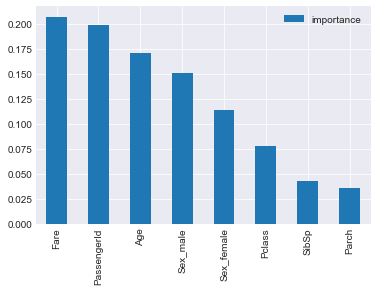

In [186]:
feature_importances.plot.bar();

PasssengerID continues to be important - this means that we have information within that we have not properly mined. But how come?

### Partial Dependence 

Another useful interpretation plot is partial dependence. `sklearn` might not have a workable library out of the box, but `pdpbox` is worth a try, although you are open to use any.

In [191]:
from pdpbox import pdp

In [ ]:
pdp_sex = pdp.pdp_isolate(
    model=rf_initial_noembarked, dataset=titanic_data, model_features=titanic_features, feature='Sex'
)

def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1c1b28d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1c1d2ba8>})

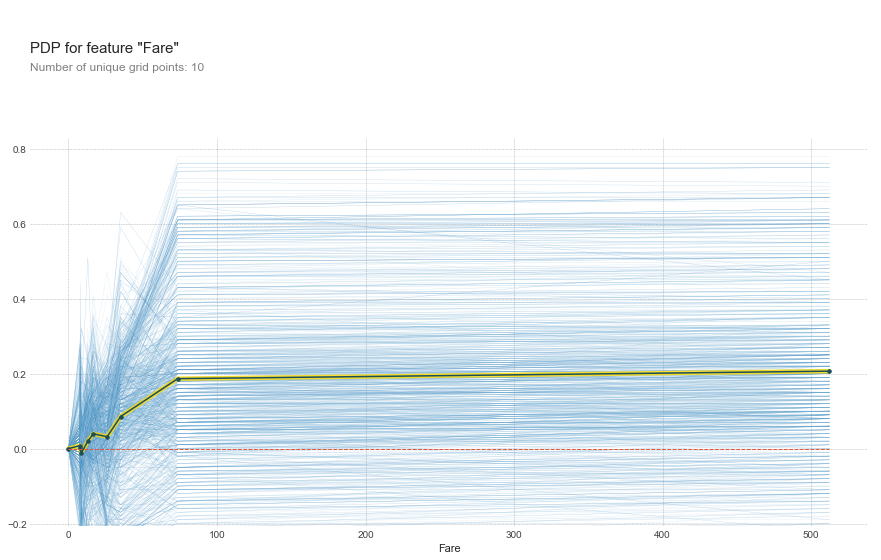

In [198]:
pdp_fare = pdp.pdp_isolate(
    rf_initial_noembarked, 
    titanic_dummies_noembarked[titanic_dummies_noembarked.columns.drop('Survived')],
    titanic_dummies_noembarked.columns.drop('Survived'),
    'Fare'
)

pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, cluster=False)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a222699e8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a22294e48>})

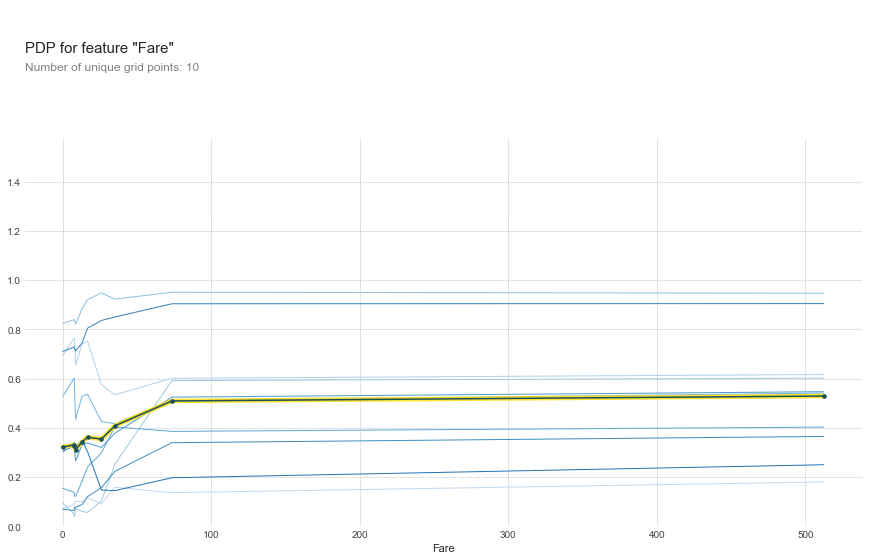

In [209]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, cluster=True, n_cluster_centers=10, center=False)

For fare, the partial dependence plot suggests that survival rates actuall *fall* when prices incease, until about $40. After which, rates rise until about $80, after which the trees lose their ability to predict as it hits the upper limit of the rules.

The upper 10 percentile enjoys a rate of about 60% survival rate at max fare, but the next 10 percentile already drops to 40% survival. Beyond which, fare becomes less and less significant, at 25%, 24% and 22%ish, which all go to show that fares do not provide that much explanation power, despite being the most significant variable in terms of feature importance.

In [202]:
pdp_age = pdp.pdp_isolate(
    rf_initial_noembarked, 
    titanic_dummies_noembarked[titanic_dummies_noembarked.columns.drop('Survived')],
    titanic_dummies_noembarked.columns.drop('Survived'),
    'Age'
)

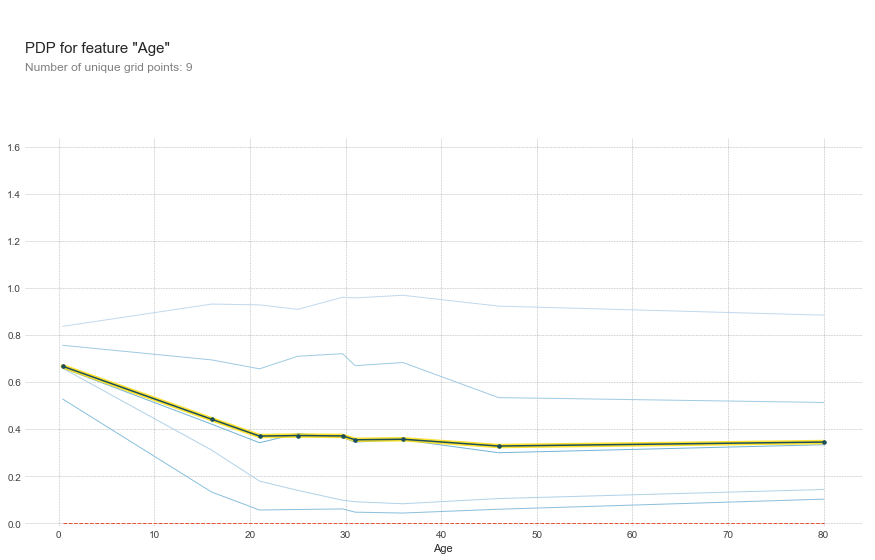

In [211]:
pdp.pdp_plot(pdp_age, 'Age', plot_lines=True, cluster=True, n_cluster_centers=5, center=False);

Age wise, we see that survival rates start extremely high at all quantiles, but drop in bottom quantiles quickly at the age of 20. For the top quantile, survival rates *increase* even, and remain high throughout the ages. For all other ages however, the drop is significant and immediate.

## Feature Engineering 

In this section, you should first briefly explain your thought process - what is good, what is lacking, and what are the potential areas of information the model has yet to exploit. Following which, do some feature engineering. After every engineered feature, re-run your model and observe if there is an improvement in scores.

Running your feature importance again at different points in time can help to validate if your variables are truly important, or are they simply collinear.


<font color=red>Checkpoint: you should know how to manipulate pandas columns, such as using lambdas.</font>

My first intuition is that names play a large part in this prediction. Firstly, last names could significantly determine the family the person belong today. Certain families could be considered royalty, which mean that their family names will become significant variables. Perhaps for names that are relatively more common, we will put a dummy variable for them.

Secondly, the titles of the person may affect his position in the family as well as his status. The word "master" for example mean that a person is of prestige, while things like "Dr" may also exhibit certain level of status. These are also things we will try to pick out.

In [212]:
titanic['lastname'] = titanic['Name'].apply(lambda x: x.split(',')[0])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,lastname,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,"(18.0, 24.0]","(-0.001, 7.55]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,"(33.0, 43.0]","(39.688, 77.958]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,"(24.0, 29.0]","(7.854, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,"(33.0, 43.0]","(39.688, 77.958]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,"(33.0, 43.0]","(7.854, 8.05]"


In [252]:
titanic['firstname'] = titanic['Name'].apply(lambda x: x.split(',')[1])
titanic['title'] = titanic['firstname'].apply(lambda x: x.split('.')[0])
titanic.groupby('title').count()[['Name']]

,Name
title,
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182


We will look at the significant ones: Dr, Master, Miss, Mr, Mrs and Rev.

In [253]:
for title in ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']:
    titanic[title] = (titanic['title'].str.strip(' ') == title)
    titanic[title] = titanic[title].astype('int')
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_bin,Fare_bin,Dr,Master,Miss,Mr,Mrs,Rev,firstname,title
864,865,0,2,"Gill, Mr. John William",male,24.000000,0,0,233866,13.0000,...,"(18.0, 24.0]","(10.5, 14.454]",0,0,0,1,0,0,Mr. John William,Mr
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.000000,1,0,SC/PARIS 2149,13.8583,...,"(24.0, 29.0]","(10.5, 14.454]",0,0,1,0,0,0,Miss. Asuncion,Miss
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.000000,0,0,SC/AH Basle 541,13.7917,...,"(18.0, 24.0]","(10.5, 14.454]",0,0,0,0,1,0,Mrs. Amin S (Marie Marthe Thuillard),Mrs
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.000000,1,0,28134,11.5000,...,"(18.0, 24.0]","(10.5, 14.454]",0,0,0,1,0,0,Mr. Frederick Edward,Mr
776,777,0,3,"Tobin, Mr. Roger",male,29.699118,0,0,383121,7.7500,...,"(29.0, 29.699]","(7.55, 7.854]",0,0,0,1,0,0,Mr. Roger,Mr
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.000000,1,0,W.E.P. 5734,61.1750,...,"(43.0, 80.0]","(39.688, 77.958]",0,0,0,1,0,0,Mr. Herbert Fuller,Mr
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.000000,0,1,111361,57.9792,...,"(0.419, 18.0]","(39.688, 77.958]",0,0,1,0,0,0,Miss. Jean Gertrude,Miss
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.000000,1,0,349237,17.8000,...,"(24.0, 29.0]","(14.454, 21.679]",0,0,0,1,0,0,Mr. Josef,Mr
420,421,0,3,"Gheorgheff, Mr. Stanio",male,29.699118,0,0,349254,7.8958,...,"(29.0, 29.699]","(7.854, 8.05]",0,0,0,1,0,0,Mr. Stanio,Mr
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,...,"(43.0, 80.0]","(39.688, 77.958]",0,0,0,0,1,0,Mrs. Richard Leonard (Sallie Monypeny),Mrs


In [254]:
titanic = titanic.drop(['firstname'], axis=1)
titanic = titanic.drop('title', axis=1)

In [255]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,lastname,Age_bin,Fare_bin,Dr,Master,Miss,Mr,Mrs,Rev
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,"(18.0, 24.0]","(-0.001, 7.55]",0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,"(33.0, 43.0]","(39.688, 77.958]",0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,"(24.0, 29.0]","(7.854, 8.05]",0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,"(33.0, 43.0]","(39.688, 77.958]",0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,"(33.0, 43.0]","(7.854, 8.05]",0,0,0,1,0,0


In [259]:
titanic.groupby('lastname').count()[['Name']].sort_values('Name', ascending=False).head()

,Name
lastname,
Andersson,9
Sage,7
Skoog,6
Carter,6
Goodwin,6


Looking at this distribution, this makes it way too susceptible to overfitting... maybe not!

In [261]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,lastname,Age_bin,Fare_bin,Dr,Master,Miss,Mr,Mrs,Rev
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891,891,891,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3,667,7,10,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Yasbeck, Mr. Antoni",male,NaN,NaN,NaN,CA. 2343,NaN,S,Andersson,"(29.0, 29.699]","(7.854, 8.05]",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646,9,177,106,NaN,NaN,NaN,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,NaN,0.007856,0.044893,0.204265,0.580247,0.140292,0.006734
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,NaN,0.088337,0.207186,0.403390,0.493796,0.347485,0.081830
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


# 4. Model Re-Training and Fine-Tuning

## Model Re-Training

When you are confident of your variables, re-run your model with all your variables again, and observe your feature importance. At times having extra variables may even deprove scores. You may also wish to remove features that show insignificant partial dependence. 

How much accuracy did these engineered features give? How important were these features? At this point in time, you may wish to talk to your peers and identify features they came up with (original ones, not those taken from the internet). This is a stage where brainstorming and contextual knowledge is extremely helpful.

In [268]:
titanic_noname_noticket = titanic.drop(['Name', 'Ticket', 'lastname'], axis=1)
titanic_dummies = pd.get_dummies(titanic_noname_noticket)
list(titanic_dummies.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Dr',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'Rev',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Age_bin_(0.419, 18.0]',
 'Age_bin_(18.0, 24.0]',
 'Age_bin_(24.0, 29.0]',
 'Age_bin_(29.0, 29.699]',
 'Age_bin_(29.699, 33.0]',
 'Age_bin_(33.0, 43.0]',
 'Age_bin_(43.0, 80.0]',
 'Fare_bin_(-0.001, 7.55]',
 'Fare_bin_(7.55, 7.854]',
 'Fare_bin_(7.854, 8.05]',
 'Fare_bin_(8.05, 10.5]',
 'Fare_bin_(10.5, 14.454]',
 'Fare_bin_(14.454, 21.679]',
 'Fare_bin_(21.679, 27.0]',
 'Fare_bin_(27.0, 39.688]',
 'Fare_bin_(39.688, 77.958]',
 'Fare_bin_(77.958, 512.329]']

In [276]:
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(titanic_dummies[titanic_dummies.columns.drop('Survived')], titanic_dummies['Survived'])
    rf_check = RandomForestClassifier(n_estimators=100)
    rf_check.fit(X_train, y_train)
    scores.append(rf_check.score(X_test, y_test))
np.mean(scores)

0.8148878923766816

In [277]:
feature_importances = pd.DataFrame(rf_check.feature_importances_,index = X_train.columns, columns=['importance'])\
    .sort_values('importance',ascending=False)
feature_importances

,importance
PassengerId,0.144211
Fare,0.127210
Age,0.099272
Sex_female,0.087107
Mr,0.084557
Sex_male,0.078667
Pclass,0.063609
SibSp,0.038675
Parch,0.023076
Mrs,0.021209


Dropping Rev, Dr!

In [278]:
titanic_dummies = titanic_dummies.drop(['Rev', 'Dr'], axis=1)

In [281]:
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(titanic_dummies[titanic_dummies.columns.drop('Survived')], titanic_dummies['Survived'])
    rf_check = RandomForestClassifier(n_estimators=100)
    rf_check.fit(X_train, y_train)
    scores.append(rf_check.score(X_test, y_test))
np.mean(scores)

0.8212556053811659

In [280]:
feature_importances = pd.DataFrame(rf_check.feature_importances_,index = X_train.columns, columns=['importance'])\
    .sort_values('importance',ascending=False)
feature_importances

,importance
Fare,0.128664
PassengerId,0.123390
Sex_male,0.107755
Age,0.100840
Sex_female,0.079680
Mr,0.062250
Pclass,0.057425
SibSp,0.043555
Mrs,0.023497
Parch,0.023064


In [283]:
titanic_dummies = titanic_dummies.drop([
    'Fare_bin_(10.5, 14.454]', 
    'Age_bin_(33.0, 43.0]',
    'Fare_bin_(14.454, 21.679]',
    'Fare_bin_(27.0, 39.688]',
    'Fare_bin_(7.55, 7.854]'
], axis=1)

In [285]:
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(titanic_dummies[titanic_dummies.columns.drop('Survived')], titanic_dummies['Survived'])
    rf_check = RandomForestClassifier(n_estimators=100)
    rf_check.fit(X_train, y_train)
    scores.append(rf_check.score(X_test, y_test))
np.mean(scores)

0.8228699551569507

In [286]:
feature_importances = pd.DataFrame(rf_check.feature_importances_,index = X_train.columns, columns=['importance'])\
    .sort_values('importance',ascending=False)
feature_importances

,importance
PassengerId,0.142460
Fare,0.128445
Age,0.107339
Sex_female,0.086648
Mr,0.081248
Pclass,0.069580
Sex_male,0.068621
SibSp,0.047761
Mrs,0.037114
Parch,0.026200


In [287]:
titanic_dummies = titanic_dummies.drop([
    'Fare_bin_(-0.001, 7.55]',
    'Fare_bin_(77.958, 512.329]',
    'Fare_bin_(21.679, 27.0]',
    'Age_bin_(0.419, 18.0]',
    'Fare_bin_(39.688, 77.958]',
    'Embarked_Q'
], axis=1)

In [292]:
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(titanic_dummies[titanic_dummies.columns.drop('Survived')], titanic_dummies['Survived'])
    rf_check = RandomForestClassifier(n_estimators=100)
    rf_check.fit(X_train, y_train)
    scores.append(rf_check.score(X_test, y_test))
np.mean(scores)

0.8170403587443945

In [293]:
feature_importances = pd.DataFrame(rf_check.feature_importances_,index = X_train.columns, columns=['importance'])\
    .sort_values('importance',ascending=False)
feature_importances

,importance
Fare,0.161079
PassengerId,0.154349
Age,0.118176
Sex_female,0.088679
Mr,0.086328
Sex_male,0.070691
Pclass,0.064721
SibSp,0.048039
Parch,0.026804
Miss,0.025074


In [299]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dummies[titanic_dummies.columns.drop('Survived')], titanic_dummies['Survived'])
rf_check = RandomForestClassifier(n_estimators=1000)
rf_check.fit(X_train, y_train)
rf_check.score(X_test, y_test)

0.8161434977578476

## Model Tuning - Good for presentation

Finally, we should do some model tuning. We previously ran a "default" model, with no customization inside our RandomForestClassifier model. However, if we were to look at the parameters, we'll see that there are many you can change.

In [53]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Evidently, there are many variables worth checking out. For now, some of the most salient ones are `max_depth`, `max_leaf_nodes`, `max_features` and `n_estimators`. These are in general, all parameters we tweak to decrease overfitting. Try tuning these parameters, plotting a graph of model accuracy against parameter variation for each variable.

Other useful parameters are `oob_score`, which serves as a validation set of unsampled data points during the bootstrap, and `n_jobs`, which parallelises the process. We recommend you set `oob_score` to `True` (and use the oob_score as a metric), and `n_jobs` to `-1` to speed up your training process.
<br /><br />
<font color=red>This is not a prerequisite per se, but at this point, you should try to understand the bootstrapping concept. After all, this single concept gave rise to random forests and many other statistical methods we know today!</font>

In [300]:
from sklearn.model_selection import GridSearchCV

In [308]:
max_depths = [None, 10, 5, 3]
max_leaf_nodes = [None, 3, 5, 10]
max_features = ['auto', 0.5, 0.7, 'sqrt']
n_folds = 3
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=1000), {
    'max_depth': max_depths,
    'max_leaf_nodes': max_leaf_nodes,
    'max_features': max_features,
    'n_jobs': [-1]
}, cv=n_folds, n_jobs=-1)

In [309]:
grid_search.fit(titanic_dummies[titanic_dummies.columns.drop('Survived')], titanic_dummies['Survived'])

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [None, 10, 5, 3], 'max_leaf_nodes': [None, 3, 5, 10], 'max_features': ['auto', 0.5, 0.7, 'sqrt'], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [310]:
grid_search.best_params_

{'max_depth': None, 'max_features': 0.5, 'max_leaf_nodes': 10, 'n_jobs': -1}

In [311]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dummies[titanic_dummies.columns.drop('Survived')], titanic_dummies['Survived'])
rf_check = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features=0.5, max_leaf_nodes=10)
rf_check.fit(X_train, y_train)
rf_check.score(X_test, y_test)

0.8161434977578476

### Subsampling 

The `fastai` library has a very cool method called `set_rf_samples`, which sets the number of subsamples we use in each tree we initalize. For more information, you may refer [here on stackoverflow](https://stackoverflow.com/questions/44955555/how-can-i-set-sub-sample-size-in-random-forest-classifier-in-scikit-learn-espec). You might wish to play with this variable, as it can give you some improved performance.

### Cross Validation (Optional)

If we think about what we do with validation, we're actually taking a portion (20%) of our data out of our training set for validation purposes. This means that we are sacrificing training data (and hence predictive power) to create a less overfitted, more generalised model. There is a trade-off for our model: we remove overfitting (variance) by sacrificing predictive power (increasing bias). This is known as the bias variance trade-off, which we will go into more detail next week.

We will go into details next week, but in short, this can be avoided using cross validation. If you have done this before, you may use cross validation to improve the model here. Report your accuracy.

Otherwise, if we know all the validation scores for all our models, simply pick the best model in terms of validation score. Report your accuracy. 

Put back all our data into one big training set, and re-train the model using this training set. You can now make a prediction on your test set, and submit your result to Kaggle!

### Submission

What is your Kaggle leaderboard performance? Please provide your Kaggle username as well. Our expectation: at least 82%.

In [316]:
!ls data

sample_submission.csv titanic.csv           train_ver2.csv
test_ver2.csv         titanic_test.csv


In [317]:
test = pd.read_csv('data/titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [318]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,...,Sex_male,Embarked_C,Embarked_S,"Age_bin_(18.0, 24.0]","Age_bin_(24.0, 29.0]","Age_bin_(29.0, 29.699]","Age_bin_(29.699, 33.0]","Age_bin_(43.0, 80.0]","Fare_bin_(7.854, 8.05]","Fare_bin_(8.05, 10.5]"
755,756,2,0.670000,1,1,14.5000,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
29,30,3,29.699118,0,0,7.8958,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
13,14,3,39.000000,1,5,31.2750,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
582,583,2,54.000000,0,0,26.0000,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
779,780,1,43.000000,0,1,211.3375,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [319]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Master',
       'Miss', 'Mr', 'Mrs', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_S', 'Age_bin_(18.0, 24.0]', 'Age_bin_(24.0, 29.0]',
       'Age_bin_(29.0, 29.699]', 'Age_bin_(29.699, 33.0]',
       'Age_bin_(43.0, 80.0]', 'Fare_bin_(7.854, 8.05]',
       'Fare_bin_(8.05, 10.5]'],
      dtype='object')

In [329]:
test['firstname'] = test['Name'].apply(lambda x: x.split(',')[1])
test['title'] = test['firstname'].apply(lambda x: x.split('.')[0])
test['Master'] = (test['title'].str.strip(' ') == 'Master').astype('int')
test['Mr'] = (test['title'].str.strip(' ') == 'Mr').astype('int')
test['Miss'] = (test['title'].str.strip(' ') == 'Mrs').astype('int')
test['Mrs'] = (test['title'].str.strip(' ') == 'Miss').astype('int')
test['Sex_female'] = (test['Sex'] == 'female').astype('int')
test['Sex_male'] = (test['Sex'] == 'male').astype('int')
test['Embarked_C'] = (test['Embarked'] == 'C').astype('int')
test['Embarked_S'] = (test['Embarked'] == 'S').astype('int')
test['Age_bin_(18.0, 24.0]'] = (test['Age'].between(18.01, 24)).astype('int')
test['Age_bin_(24.0, 29.0]'] = (test['Age'].between(24.01, 29)).astype('int')
test['Age_bin_(29.0, 29.699]'] = (test['Age'].between(29.001, 29.699)).astype('int')
test['Age_bin_(29.699, 33.0]'] = (test['Age'].between(29.7, 33)).astype('int')
test['Age_bin_(43.0, 80.0]'] = (test['Age'].between(43.01, 80)).astype('int')
test['Fare_bin_(7.854, 8.05]'] = (test['Fare'].between(7.855, 8.05)).astype('int')
test['Fare_bin_(8.05, 10.5]'] = (test['Fare'].between(8.051, 10.5)).astype('int')

In [339]:
test['Fare'] = test['Fare'].fillna(test.Fare.mean())
test['Age'] = test['Age'].fillna(titanic.Fare.mean())

In [340]:
test[X_test.columns].describe(include='all')

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,...,Sex_male,Embarked_C,Embarked_S,"Age_bin_(18.0, 24.0]","Age_bin_(24.0, 29.0]","Age_bin_(29.0, 29.699]","Age_bin_(29.699, 33.0]","Age_bin_(43.0, 80.0]","Fare_bin_(7.854, 8.05]","Fare_bin_(8.05, 10.5]"
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.670005,0.447368,0.392344,35.627188,0.050239,0.172249,0.574163,0.186603,...,0.636364,0.244019,0.645933,0.184211,0.129187,0.0,0.083732,0.148325,0.095694,0.071770
std,120.810458,0.841838,12.658698,0.896760,0.981429,55.840500,0.218700,0.378049,0.495062,0.390059,...,0.481622,0.430019,0.478803,0.388120,0.335808,0.0,0.277317,0.355848,0.294523,0.258417
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,32.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [341]:
test['Survived'] = rf_check.predict(test[X_test.columns])

In [343]:
test[['PassengerId', 'Survived']].to_csv('data/submission.csv', index=False)

In [344]:
!less data/submission.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,1
911,0
912,0
913,0
914,1bmission.csv
:

In [345]:
# Accuracy: .76555
# Kaggle name: ningyuuu

## Future Improvements

Not all models are perfect, especially not in the constraint of time. Do some research on the models that do better than you, and list out the areas that you can improve on in the long run. Prioritise these improvements and spell out how you can implement them if they are non-trivial to implement.

# 5. Building your Random Forest from Scratch

Congratulations! You have completed the tutorial on random forests... not!

Apart from modelling, each week, you will also be expected to implement the models we are using. After all, the best way to learn is to implement from scratch. AI Apprentices are not only expected to model, but also do the necessary engineering for real life problems, and many such problems require custom code. For example, we may want to use subsampling to improve our model performance, but edge-cutting methods would not yet be available in common libraries. When this happens, you will have to address these problems yourself.

Numerical programming might be new to some, if you did not come from the R/Matlab side of things. To get yourself up to speed with numerical programming in Python, we highly recommend Wes McKinney's [Python for Data Analysis, 2nd Ed.](https://www.safaribooksonline.com/library/view/python-for-data/9781491957653/)

__Note__: In this guided implementation, we made 2 decisions, firstly to use a Python `class`, i.e. object oriented programming (arguably so at least), and secondly to use the `numpy` library. Neither of these decisions are compulsory - if you have prior experience in another style, or using alternative libraries, feel free to do so, and modify the script to allow your code to run. However, if you have no prior experience, we suggest sticking to this format - we will follow `scikit-learn`'s format, which we believe is increasingly an industry standard.

## Decision Trees 

A random forest, as the the name suggests, is made up of many decision trees, each with levels of variation and randomness. Before looking at random forests, we will look at understanding what decision trees do.

Decision trees, more specifically Classification and Regression Trees (CARTs), are an algorithm/data structure that learns to split data out based on rules it learns. There are many resources out there to get a good understanding of what CARTs are, which you may wish to reference while accomplishing the tasks here.

### Gini Criterion

If you remember from `get_params`, there exists a parameter `criterion: 'gini'`. This means that the tree is using Gini as a criterion to decide how to separate the data.

Hence, we will first learn how to use the Gini impurity score. The Gini impurity score of a node n is given as:  

<center>$i(n) = 1 - p^2_0 - p^2_1$,  </center>  

Where $p_1$ refers to the proportion of 1's in that node, and $p_0$ refers to the proportion of 0's.

In [ ]:
from src.decision_tree import DecisionTree

For the above line of code to work, you will have to do the following if you haven't done so:
1. Create a folder called src at the directory of your current notebook
2. Create a __init__.py empty file in the src folder -see http://mikegrouchy.com/blog/2012/05/be-pythonic-__init__py.html
3. Create a file, `decision_tree.py`. You can consider the terminal script `touch decision_tree.py`
4. create a class `DecisionTree` inside `deicison_tree.py`

You may realise that for this part of the coursework, we are not writing code directly into Jupyter notebooks, but inside the /src/ folder as `.py` files. We are maintaining a code base, outside of the Jupyter notebook. We do this for two reasons - 1) because this code is highly reusable in future sessions, beyond the scope of one notebook. 2) because such code bases are collaboration-friendly, as Git and Jupyter notebooks do not play well with each other, but python files do. In the future, non-exploratory code will be written in teams, so scripts would be a more collaboration friendly format. The `src/` folder structure is a very basic and light introduction to this, but in short, each project should have a different folder structure to cater to its needs.

In [ ]:
def approx_eq(a, b, num_sig=5):
    return round(a, num_sig) == round(b, num_sig)

In [ ]:
approx_eq(DecisionTree().gini([1, 0, 0, 0, 0], [1, 1, 1, 1, 0]), .32)
# for the above line of code to work,
# 1. create a method gini that takes in 2 arrays and computes the node's gini impurity
# 2. implement the method as per the mathematical formula given
# 3. if you would like to turn this into a private method, make the necessary adjustments
# -> DecisionTree()._DecisionTree__gini()

### fit(X_train, y_train)

Following sklearn's `fit` and `predict`/`score` approach to programming, we will be implementing the fit and predict methods. First, we will attempt to implement a fit method.

The fit method will take in 2 numpy matrices: a m\*n train array with m training examples of n features, and a m\*1 array of labels.

There are tons of resources available to describe the workings of a CART. We would encourage you to find a source that best suits your needs, but we have picked out two points which other resources may miss at the implementation stage. Feel free to find more resources to expand on these areas:

1. The CART is a recursive tree structure. Every node of the tree can be seen as a decision tree node. When it splits, its left and right branches and its child nodes. When fitting a tree, you should recursively fit the nodes of the tree, in a way that the fitting can be used to predict in the future.

2. In finding the best condition to split the variables, it is alright to iterate through every single unique value of every variable, and determine the best condition through the iterations. The best condition can be defined as the one that provides the most __information gain__, which is defined as the greatest loss in Gini impurity.

If this is your first time doing object oriented programming in Python, we would high recommend you expose yourself to some Python resources first, or read the Python documentation. __If you need more help with these methods, ask a peer with programming experience, or you can seek help from the team.__

In [ ]:
# read a new csv and remove complicated columns
titanic = pd.read_csv('data/titanic.csv')
X_cols = titanic.columns
X_cols = X_cols.drop('Age')
X_cols = X_cols.drop('Cabin')
X_cols = X_cols.drop('Name')
X_cols = X_cols.drop('Ticket')
titanic = titanic[X_cols]

# one hot encoding for remainining multiclass columns
titanic['Sex_m'] = (titanic['Sex'] == 'male').astype('int')
titanic['Embarked_S'] = (titanic['Embarked'] == 'S').astype('int')
titanic['Embarked_C'] = (titanic['Embarked'] == 'C').astype('int')
titanic = titanic.drop(['Sex', 'Embarked'], axis=1)

# create X and y, test and train
X_cols = titanic.columns
X_cols = X_cols.drop('Survived')
X_titanic = titanic[X_cols]
y_titanic = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, random_state=99)

In [ ]:
dt = DecisionTree()

In [ ]:
dt.fit(X_train.values, y_train.values)

### predict(X_test)

If you have designed your `fit` method well, predict method will be naturally easy. If the node is a leaf, simply return the leaf value. If the node is not a leaf, call predict on one of its child nodes depending on whether it fits the condition.

__If you need more help with these methods, ask a peer with programming experience, or you can seek help from the team.__

In [ ]:
preds_dt = dt.predict(X_test.values)
sum(preds_dt == y_test)/len(y_test)

## Random Forests

Now that we have a decision tree, we can build a random forest, comprising of decision trees of randomised bootstraps of our dataset. At the simplest level, a random forest can be simply a list of decision trees that take a vote on the outcome of the prediction. This list can be an attribute of the random forest.

The basic modification of random forests is the use of bootstrapping. Bootstrapping is done in a few lines of code through `np.random.choice`.

Hence, to begin, build a simple random forest, that will initialise 5 trees through bootstrapping (sampling 100% with replacement), and predict the answer through a voting mechanism out of all the 5 trees. For computational efficiency, we recommend using `np.stack` and `np.array.mean`.

In [ ]:
rf_0 = RandomForest()
rf_0.fit(X_train.values, y_train.values)
preds_rf = rf_0.predict(X_test.values)
sum(preds_rf == y_test)/len(y_test)

Next, we will implement `n_trees` to be tweakable. In addition, we will have a `subsample_size` parameter, which does the subsampling that the sklearn's random forest could not do. We can continue to use `np.random.choice`, but if subsample_size > 1, we can sample without replacement instead. (Or you could have another parameter to adjust that too.)

In [ ]:
rf_1 = RandomForest(n_trees=10, subsample_size=0.8)
rf_1.fit(X_train.values, y_train.values)
preds_rf1 = rf_1.predict(X_test.values)
sum(preds_rf1 == y_test)/len(y_test)

Finally, we will implement the `feature_proportion` feature, which refers to the number of features we allow each tree to use. This further increases the randomness and eliminates overfitting.

In [ ]:
rf_2 = RandomForest(n_trees=100, subsample_size=0.5, feature_proportion=0.5)
rf_2.fit(X_train.values, y_train.values)
preds_rf2 = rf_2.predict(X_test.values)
sum(preds_rf2 == y_test)/len(y_test)

You may wish to attempt to implement other optional parameters of random forest. One important parameter is `max_features` which makes the tree lose some features at every node, or `max_depth`, which limits the number of levels the tree can have. However, we chose to leave these out, as they require tweaking at the decision tree level, which is an exercise left for your own choice.

__Congratulations!__ You have finally come to the end of the week 1. Hope you had as much fun as we had building it!